<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Решающие деревья

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 6.5)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import sklearn

In [4]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.5 MB/s eta 0:00:00


In [5]:
# import category_encoders

In [6]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import sklearn
from sklearn.model_selection import cross_val_score, cross_validate

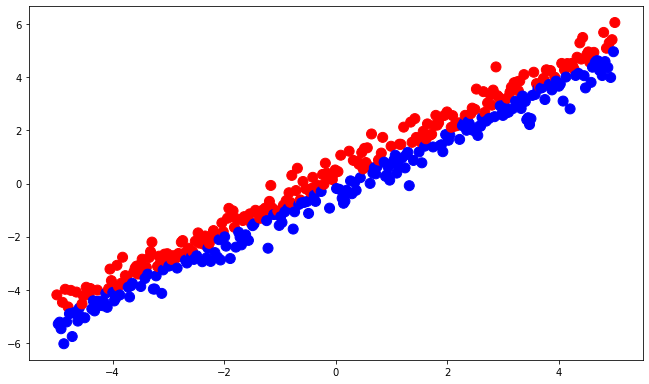

In [7]:
n = 400
np.random.seed(1)
X = np.zeros((n, 2))
X[:, 0] = np.linspace(-5, 5, n)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)

plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='bwr')
plt.show()

In [8]:
def train_model(model=LogisticRegression()):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_decision_regions(X_test, y_test, model)

    print(f"Accuracy :{accuracy_score(y_pred, y_test):.2f}")

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy :0.98


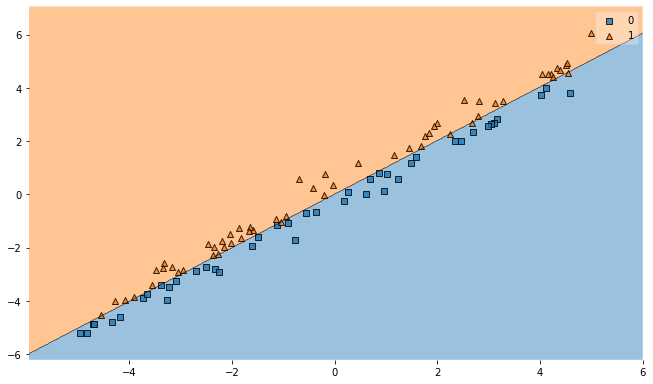

In [9]:
train_model(LogisticRegression())

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy :0.74


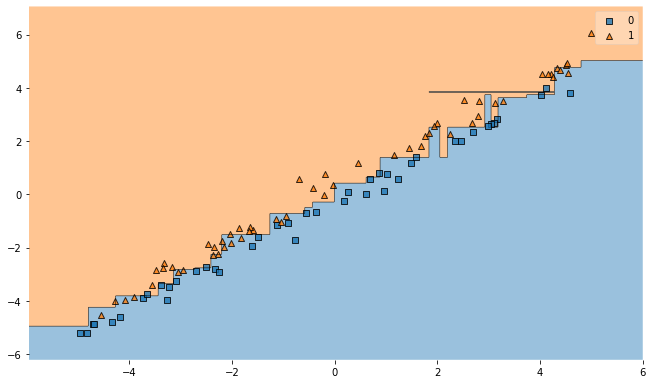

In [10]:
train_model(DecisionTreeClassifier(random_state=13))

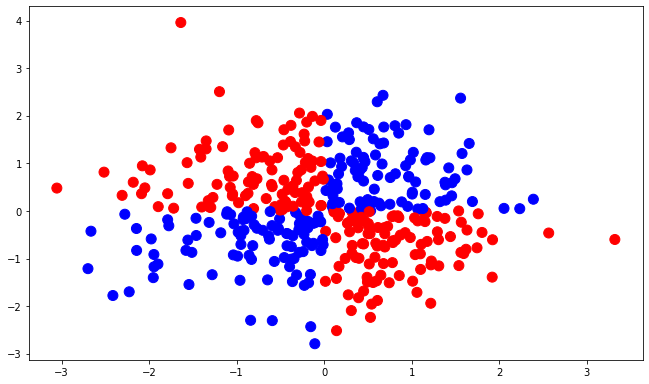

In [11]:
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy :0.43


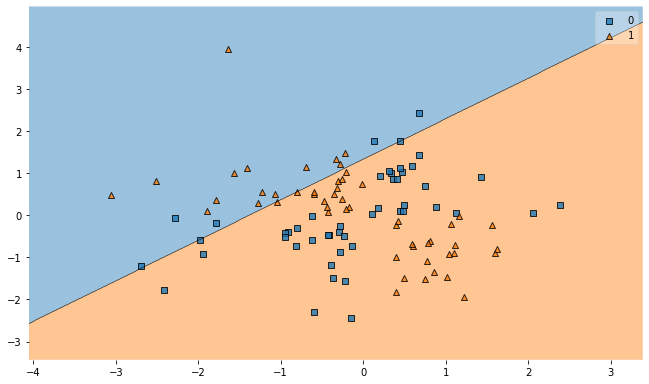

In [12]:
train_model(LogisticRegression())

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy :1.00


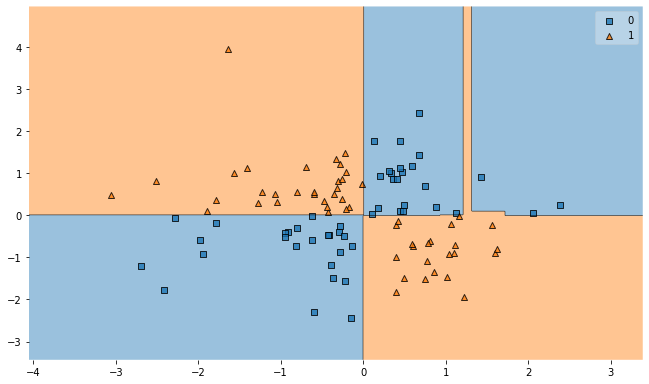

In [13]:
train_model(DecisionTreeClassifier(random_state=13))

Переобучение

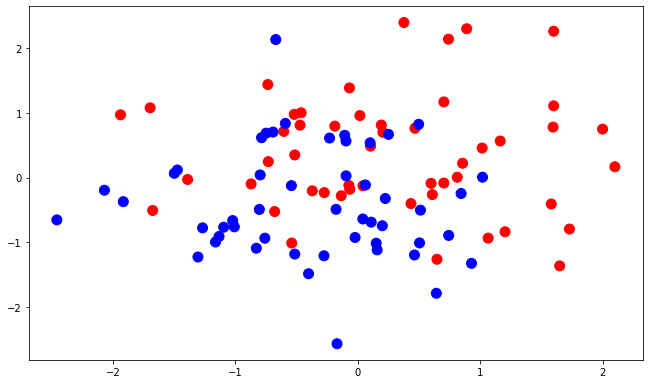

In [14]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

Проверим, как разные значения гиперпараметров решающего дерева влияют на его структуру:

*max_depth: максимальная глубина дерева*


*min_samples_leaf: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листом*

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

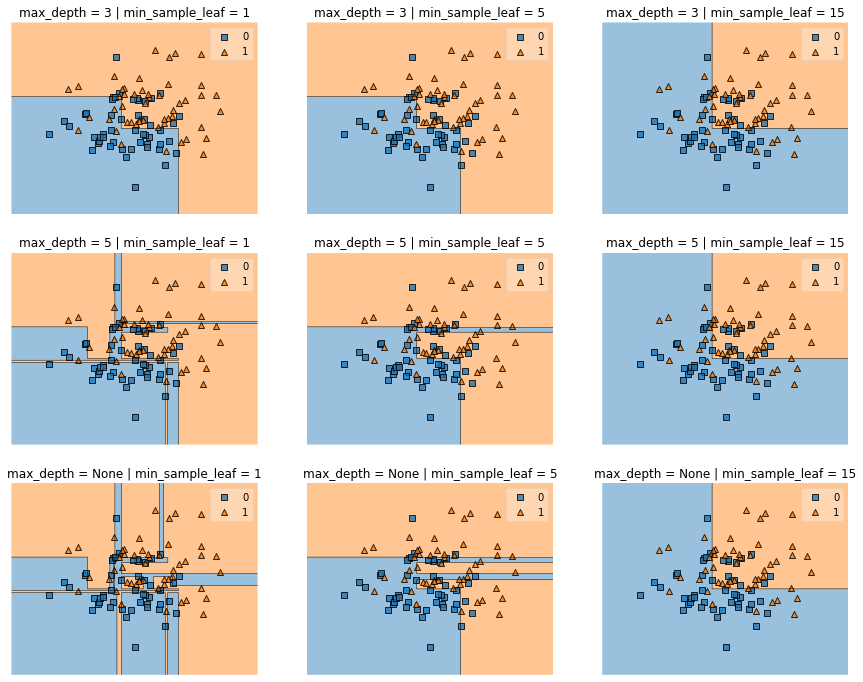

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

for i, max_depth in enumerate([3,5, None]):
    for j, min_sample_leaf in enumerate([1,5,15]):
        dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf, random_state=13)
        dtc.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_sample_leaf = {}".format(max_depth, min_sample_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dtc, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


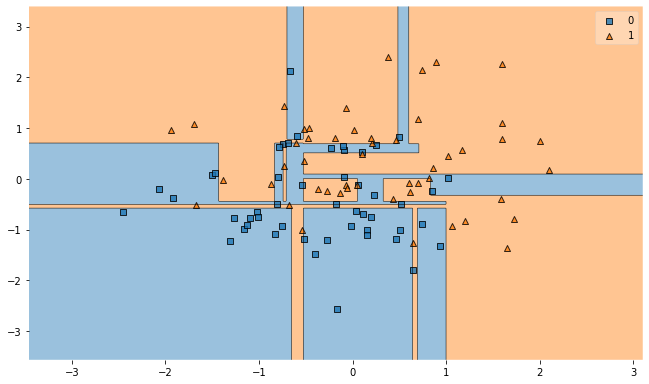

In [16]:
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)

model.fit(X, y)

plot_decision_regions(X, y, model)
plt.show()

**Неустойчивость**


Как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки из исходной?

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

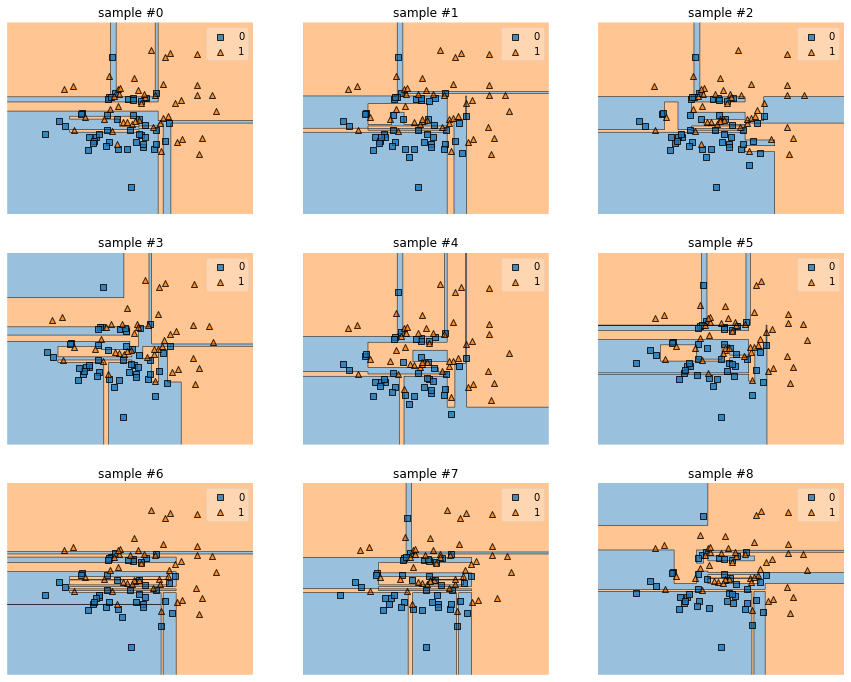

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
        
plt.show()

Датасет
Построим решающее дерево для какого-нибудь набора данных.

In [18]:
boston = load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(f"Shape: {X.shape}")
X.head()

Shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


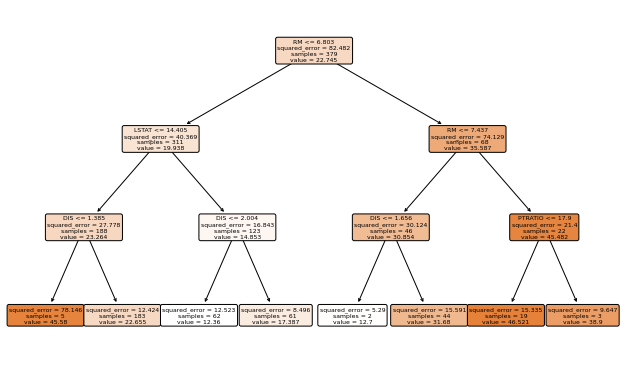

In [20]:
tree = DecisionTreeRegressor(max_depth=3, random_state=13)
tree.fit(X_train, y_train)

plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [24]:
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
children_left, children_right, feature

(array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1],
       dtype=int64),
 array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1],
       dtype=int64),
 array([ 5, 12,  7, -2, -2,  7, -2, -2,  5,  7, -2, -2, 10, -2, -2],
       dtype=int64))

In [27]:
treshold = tree.tree_.threshold
treshold

array([ 6.80299997, 14.40499973,  1.38484997, -2.        , -2.        ,
        2.00370002, -2.        , -2.        ,  7.43700004,  1.65555   ,
       -2.        , -2.        , 17.89999962, -2.        , -2.        ])

In [29]:
round(mean_squared_error(y_test, tree.predict(X_test)),1)

37.7

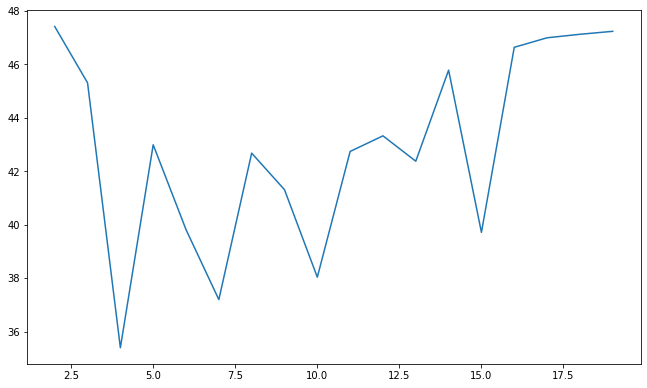

In [36]:
from sklearn.model_selection import cross_val_score

max_deth_array = range(2, 20)
mean_error = []

for i in max_deth_array:
    tree = DecisionTreeRegressor(max_depth=i, random_state=13)
    mean = -cross_val_score(tree, X, y, cv=3, scoring='neg_mean_squared_error').mean()
    mean_error.append(mean)

plt.plot(max_deth_array, mean_error)
plt.show()

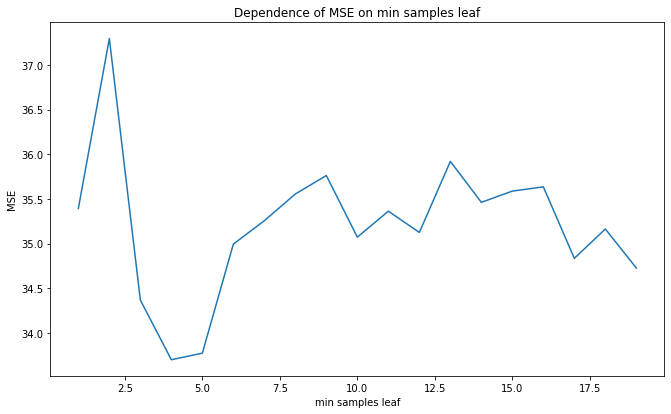

In [37]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=min_samples_leaf, random_state=13)
    res = -cross_val_score(dt, X, y, cv=3, scoring='neg_mean_squared_error').mean()
    mse_array.append(res)
    
plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [39]:
tree = DecisionTreeRegressor()

tree.fit(Xtrain, ytrain)

pred_train = tree.predict(Xtrain)
pred_test = tree.predict(Xtest)

In [40]:
from sklearn.metrics import r2_score

r2_score(ytrain, pred_train), r2_score(ytest, pred_test)

(1.0, 0.7278931444577688)

In [41]:
tree2 = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5)

tree2.fit(Xtrain, ytrain)

pred_train2 = tree2.predict(Xtrain)
pred_test2 = tree2.predict(Xtest)

r2_score(ytrain, pred_train2), r2_score(ytest, pred_test2)

(0.9078345643677346, 0.6861912154831729)

In [42]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : np.arange(2, 12),
          'max_features' : ["auto", "sqrt", "log2"] }

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, scoring='r2')

gs.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='r2')

In [43]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='sqrt')

In [ ]:
path = tree.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path['ccp_alphas']

alphas

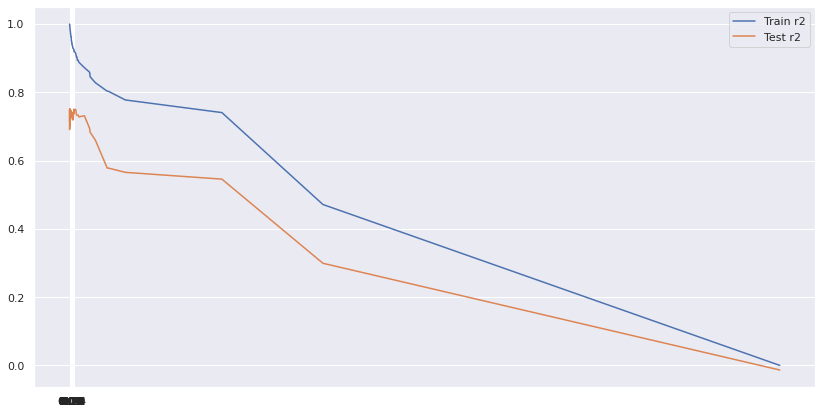

In [45]:
import seaborn as sns
from sklearn.metrics import r2_score


accuracy_train,accuracy_test=[],[]
MaxR2 = -1
Alpha = 0

for i in alphas:
    tree = DecisionTreeRegressor(ccp_alpha = i)
    
    tree.fit(Xtrain, ytrain)
    y_train_pred = tree.predict(Xtrain)
    y_test_pred = tree.predict(Xtest)
    
    accuracy_train.append(r2_score(ytrain, y_train_pred))
    accuracy_test.append(r2_score(ytest, y_test_pred))
    
    R2 = r2_score(ytest, y_test_pred)
    if R2 > MaxR2:
        MaxR2 = R2
        Alpha = i
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = accuracy_train, x = alphas, label = "Train r2")
sns.lineplot(y = accuracy_test, x = alphas, label = "Test r2")
plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.show()

In [46]:
Alpha

0.02022903230172576